In [2]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:56771")
client

Client Scheduler: tcp://127.0.0.1:56771 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 8 Cores: 40 Memory: 169.33 GB


In [3]:
import numpy as np
import xarray as xr
# from dask.diagnostics import ProgressBar
import os.path as op
import xrft
import gsw
from scipy.interpolate import PchipInterpolator, interp1d
from xgcm.grid import Grid as xgrid
from xmitgcm import open_mdsdataset
from MITgcmutils import jmd95
from matplotlib.gridspec import GridSpec as GS
import matplotlib.colors as clr
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
ddir = '/tank/chaocean/'
savedir = '/tank/topog/tuchida/TWA/'

In [5]:
grav = 9.807
nmembs = 5
Kh = 20.
K4 = 1e10
Kr = 1e-5
thetaMax = 1e20
ystart = 10
yend = 50
t_of_interest = 1
xchunk = 500

In [6]:
dsdiag = open_mdsdataset(op.join(ddir,'qjamet/RUNS/ORAR/memb%02d/run1963/ocn/' % 24), 
                        grid_dir = op.join(ddir,'grid_chaO/gridMIT_update1/'),
                        prefix = ['diag_Tbgt2D','diag_Tbgt3D'], delta_t = 2e2,
                        iters = range(788400,943920+2160,2160)
                        ).chunk({'XC':xchunk,'XG':xchunk})
dsdiag

/tank/users/tuchida/miniconda3/envs/ensemble/lib/python3.7/site-packages/xmitgcm/mds_store.py:217: FutureWarning: In xarray version 0.15 `auto_combine` will be deprecated. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi
  ds = xr.auto_combine(datasets)
/tank/users/tuchida/miniconda3/envs/ensemble/lib/python3.7/site-packages/xmitgcm/mds_store.py:217: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarray version 0.15 this will operation will require either using the
new `combine_nested` function (or the `combine='nested'` option

<xarray.Dataset>
Dimensions:   (XC: 1000, XG: 1000, YC: 900, YG: 900, Z: 46, Zl: 46, Zp1: 47, Zu: 46, time: 73)
Coordinates:
    iter      (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time      (time) float64 1.577e+08 1.581e+08 ... 1.884e+08 1.888e+08
  * XC        (XC) >f4 262.00003 262.0861 262.17215 ... 347.88644 347.9725
  * YC        (YC) >f4 -19.916634 -19.8333 -19.749968 ... 54.916702 55.000034
  * XG        (XG) >f4 261.957 262.04306 262.12912 ... 347.8434 347.92947
  * YG        (YG) >f4 -19.9583 -19.874968 -19.791634 ... 54.875034 54.95837
  * Z         (Z) >f4 -3.0467727 -9.454049 -16.363966 ... -5624.9517 -5875.141
  * Zp1       (Zp1) >f4 0.0 -6.0935454 -12.814552 ... -5749.9097 -6000.3726
  * Zu        (Zu) >f4 -6.0935454 -12.814552 -19.91338 ... -5749.9097 -6000.3726
  * Zl        (Zl) >f4 0.0 -6.0935454 -12.814552 ... -5499.9937 -5749.9097
    rA        (YC, XC) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    dxG       (YG, XC) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    dyG       (YC, XG) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    Depth     (YC, XC) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    rAz       (YG, XG) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    dxC       (YC, XG) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    dyC       (YG, XC) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    rAw       (YC, XG) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    rAs       (YG, XC) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    drC       (Zp1) >f4 dask.array<chunksize=(47,), meta=np.ndarray>
    drF       (Z) >f4 dask.array<chunksize=(46,), meta=np.ndarray>
    PHrefC    (Z) >f4 dask.array<chunksize=(46,), meta=np.ndarray>
    PHrefF    (Zp1) >f4 dask.array<chunksize=(47,), meta=np.ndarray>
    hFacC     (Z, YC, XC) >f4 dask.array<chunksize=(46, 900, 500), meta=np.ndarray>
    hFacW     (Z, YC, XG) >f4 dask.array<chunksize=(46, 900, 500), meta=np.ndarray>
    hFacS     (Z, YG, XC) >f4 dask.array<chunksize=(46, 900, 500), meta=np.ndarray>
    maskC     (Z, YC, XC) bool dask.array<chunksize=(46, 900, 500), meta=np.ndarray>
    maskW     (Z, YC, XG) bool dask.array<chunksize=(46, 900, 500), meta=np.ndarray>
    maskS     (Z, YG, XC) bool dask.array<chunksize=(46, 900, 500), meta=np.ndarray>
    maskInC   (YC, XC) bool dask.array<chunksize=(900, 500), meta=np.ndarray>
    maskInW   (YC, XG) bool dask.array<chunksize=(900, 500), meta=np.ndarray>
    maskInS   (YG, XC) bool dask.array<chunksize=(900, 500), meta=np.ndarray>
Data variables:
    TOTTTEND  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 46, 900, 500), meta=np.ndarray>
    ADVr_TH   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 46, 900, 500), meta=np.ndarray>
    ADVx_TH   (time, Z, YC, XG) float32 dask.array<chunksize=(1, 46, 900, 500), meta=np.ndarray>
    ADVy_TH   (time, Z, YG, XC) float32 dask.array<chunksize=(1, 46, 900, 500), meta=np.ndarray>
    Diss_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 46, 900, 500), meta=np.ndarray>
    TFLUX     (time, YC, XC) float32 dask.array<chunksize=(1, 900, 500), meta=np.ndarray>
    oceQsw    (time, YC, XC) float32 dask.array<chunksize=(1, 900, 500), meta=np.ndarray>
    WTHMASS   (time, YC, XC) float32 dask.array<chunksize=(1, 900, 500), meta=np.ndarray>

In [37]:
print(dsdiag.TOTTTEND.attrs, dsdiag.ADVr_TH.attrs)

{'standard_name': 'TOTTTEND', 'long_name': 'Tendency of Potential Temperature', 'units': 'degC/day'} {'standard_name': 'ADVr_TH', 'long_name': 'Vertical   Advective Flux of Pot.Temperature', 'units': 'degC.m^3/s'}


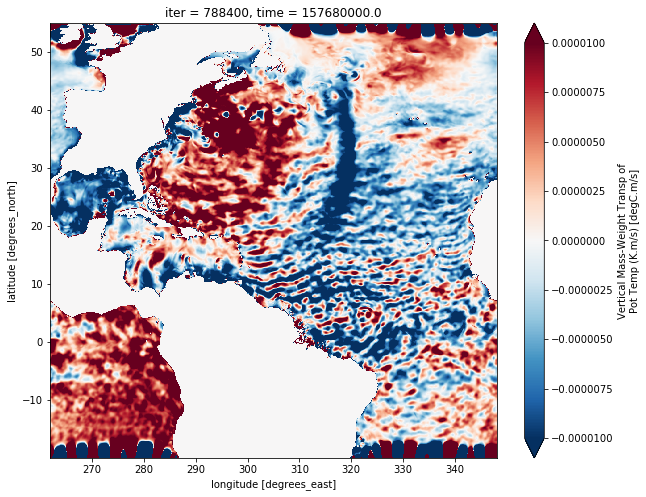

In [9]:
dsdiag.WTHMASS[0].plot(vmax=1e-5, figsize=(10,8))

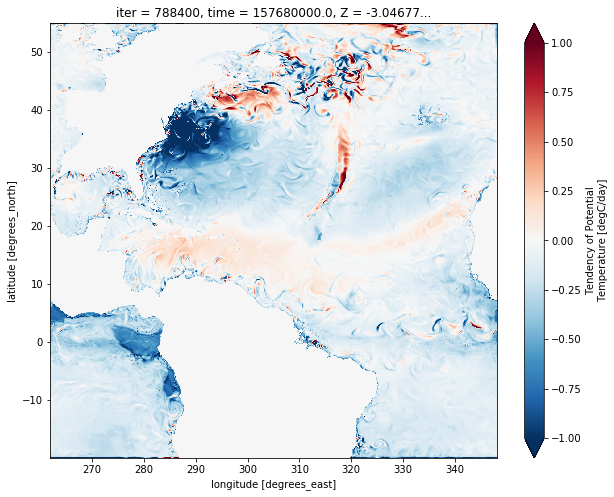

In [10]:
dsdiag.TOTTTEND[0,0].plot(vmax=1, figsize=(10,8))

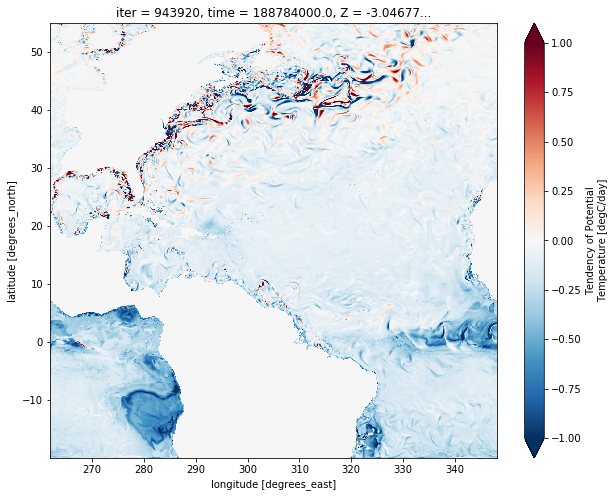

In [12]:
dsdiag.TOTTTEND[-1,0].plot(vmax=1, figsize=(10,8))

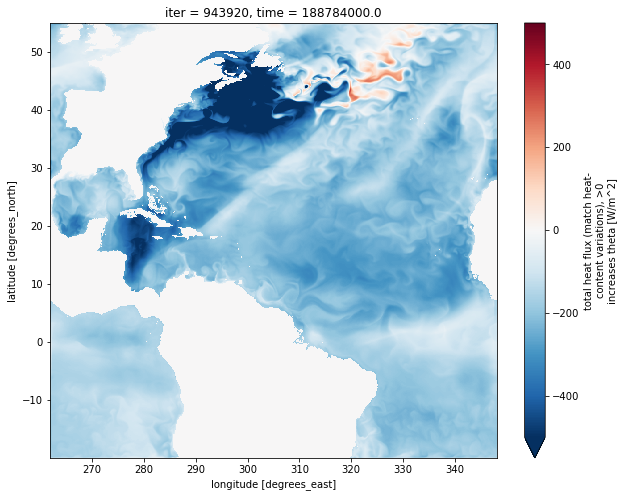

In [41]:
dsdiag.TFLUX[-1].plot(vmax=500, figsize=(10,8))

In [7]:
grid = xgrid(dsdiag, periodic=['X'])
grid

<xgcm.Grid>
X Axis (periodic):
  * center   XC --> left
  * left     XG --> center
T Axis (not periodic):
  * center   time
Y Axis (not periodic):
  * center   YC --> left
  * left     YG --> center
Z Axis (not periodic):
  * center   Z --> left
  * left     Zl --> center
  * outer    Zp1 --> center
  * right    Zu --> center

In [8]:
Vol_r = dsdiag.rA**-1 * dsdiag.drF**-1 * dsdiag.hFacC**-1
Vol_r

<xarray.DataArray (YC: 900, XC: 1000, Z: 46)>
dask.array<mul, shape=(900, 1000, 46), dtype=float32, chunksize=(900, 500, 46), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) >f4 262.00003 262.0861 262.17215 ... 347.88644 347.9725
  * YC       (YC) >f4 -19.916634 -19.8333 -19.749968 ... 54.916702 55.000034
    rA       (YC, XC) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<chunksize=(900, 500), meta=np.ndarray>
  * Z        (Z) >f4 -3.0467727 -9.454049 -16.363966 ... -5624.9517 -5875.141
    drF      (Z) >f4 dask.array<chunksize=(46,), meta=np.ndarray>
    PHrefC   (Z) >f4 dask.array<chunksize=(46,), meta=np.ndarray>
    hFacC    (Z, YC, XC) >f4 dask.array<chunksize=(46, 900, 500), meta=np.ndarray>
    maskC    (Z, YC, XC) bool dask.array<chunksize=(46, 900, 500), meta=np.ndarray>

In [9]:
Adv = - (-grid.diff(dsdiag.ADVr_TH,'Z',boundary='fill') * Vol_r
         + grid.diff(dsdiag.ADVx_TH,'X') * Vol_r
         + grid.diff(dsdiag.ADVy_TH,'Y',boundary='fill') * Vol_r
        ).where(dsdiag.maskC!=0.)
# Adv = dsdiag.AdvD_TH.where(dsdiag.maskC!=0.)
Adv

<xarray.DataArray (time: 73, Z: 46, YC: 900, XC: 1000)>
dask.array<neg, shape=(73, 46, 900, 1000), dtype=float32, chunksize=(1, 45, 899, 499), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) float64 1.577e+08 1.581e+08 ... 1.884e+08 1.888e+08
  * Z        (Z) >f4 -3.0467727 -9.454049 -16.363966 ... -5624.9517 -5875.141
  * YC       (YC) >f4 -19.916634 -19.8333 -19.749968 ... 54.916702 55.000034
  * XC       (XC) >f4 262.00003 262.0861 262.17215 ... 347.88644 347.9725
    rA       (YC, XC) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<chunksize=(900, 500), meta=np.ndarray>
    drF      (Z) >f4 dask.array<chunksize=(46,), meta=np.ndarray>
    PHrefC   (Z) >f4 dask.array<chunksize=(46,), meta=np.ndarray>
    hFacC    (Z, YC, XC) >f4 dask.array<chunksize=(46, 900, 500), meta=np.ndarray>
    maskC    (Z, YC, XC) bool dask.array<chunksize=(46, 900, 500), meta=np.ndarray>

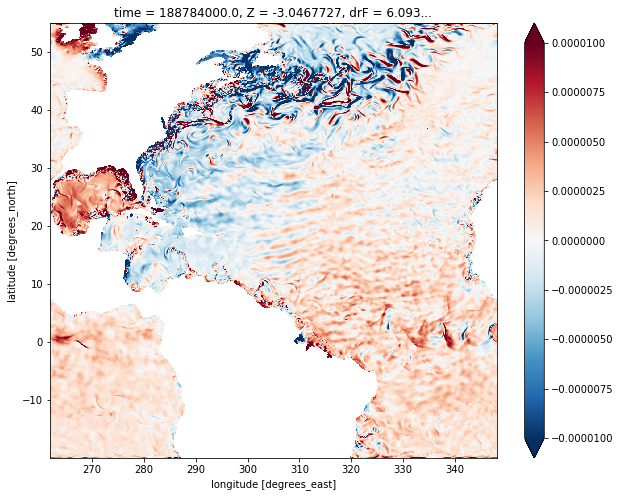

In [22]:
Adv[-1,0].plot(vmax=1e-5, figsize=(10,8))

In [18]:
# DiffE = - (-grid.diff(dsdiag.DFrE_TH,'Z',boundary='fill') * Vol_r
#           + grid.diff(dsdiag.DFxE_TH,'X') * Vol_r
#           + grid.diff(dsdiag.DFyE_TH,'Y',boundary='fill') * Vol_r
#          ).where(dsdiag.maskC!=0.)
# DiffI = (grid.diff(dsdiag.DFrI_TH,'Z',boundary='fill') * Vol_r).where(dsdiag.maskC!=0.)
# DiffE

<xarray.DataArray (Z: 46, YC: 900, XC: 1000)>
dask.array<neg, shape=(46, 900, 1000), dtype=float32, chunksize=(45, 899, 499), chunktype=numpy.ndarray>
Coordinates:
  * Z        (Z) >f4 -3.0467727 -9.454049 -16.363966 ... -5624.9517 -5875.141
  * YC       (YC) >f4 -19.916634 -19.8333 -19.749968 ... 54.916702 55.000034
  * XC       (XC) >f4 262.00003 262.0861 262.17215 ... 347.88644 347.9725
    rA       (YC, XC) >f4 83341540.0 83341540.0 ... 50843696.0 50843696.0
    Depth    (YC, XC) >f4 3440.756 3215.3306 2099.5483 ... 2916.6108 2823.8076
    maskInC  (YC, XC) bool False False False False ... False False False False
    drF      (Z) >f4 6.0935454 6.721007 7.098827 ... 249.91599 250.46292
    PHrefC   (Z) >f4 29.88884 92.74422 160.5305 ... 55180.777 57635.133
    hFacC    (Z, YC, XC) >f4 1.0 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    maskC    (Z, YC, XC) bool True True True True ... False False False False
    iter     int64 dask.array<chunksize=(), meta=np.ndarray>
    time  

In [19]:
# Kpp = grid.diff(dsdiag.KPPg_TH.where(dsdiag.maskInC!=0.),'Z',boundary='fill') * Vol_r
# Kpp

<xarray.DataArray (Z: 46, YC: 900, XC: 1000)>
dask.array<mul, shape=(46, 900, 1000), dtype=float32, chunksize=(45, 900, 500), chunktype=numpy.ndarray>
Coordinates:
  * Z        (Z) >f4 -3.0467727 -9.454049 -16.363966 ... -5624.9517 -5875.141
  * YC       (YC) >f4 -19.916634 -19.8333 -19.749968 ... 54.916702 55.000034
  * XC       (XC) >f4 262.00003 262.0861 262.17215 ... 347.88644 347.9725
    rA       (YC, XC) >f4 83341540.0 83341540.0 ... 50843696.0 50843696.0
    Depth    (YC, XC) >f4 3440.756 3215.3306 2099.5483 ... 2916.6108 2823.8076
    maskInC  (YC, XC) bool False False False False ... False False False False
    drF      (Z) >f4 6.0935454 6.721007 7.098827 ... 249.91599 250.46292
    PHrefC   (Z) >f4 29.88884 92.74422 160.5305 ... 55180.777 57635.133
    hFacC    (Z, YC, XC) >f4 dask.array<chunksize=(46, 900, 500), meta=np.ndarray>
    maskC    (Z, YC, XC) bool dask.array<chunksize=(46, 900, 500), meta=np.ndarray>

In [10]:
swfrac = .62 * np.exp(dsdiag.Zl/.6) + (1-.62) * np.exp(dsdiag.Zl/20.)
swfrac1 = .62 * np.exp(dsdiag.Zl.shift(Zl=-1)/.6) + (1-.62) * np.exp(dsdiag.Zl.shift(Zl=-1)/20.)
rho0 = 9.998e2
Cp = 3.994e3
Qsw = (dsdiag.oceQsw / (rho0*Cp) / (dsdiag.drF*dsdiag.hFacC) 
       * (swfrac - swfrac1).data
      ).where(dsdiag.maskC!=0.)
Tflx = ((dsdiag.TFLUX - dsdiag.oceQsw) 
        / (rho0*Cp*dsdiag.drF[0]*dsdiag.hFacC.isel(Z=0))
       ).where(dsdiag.maskInC!=0.)
Qsw

<xarray.DataArray (time: 73, YC: 900, XC: 1000, Z: 46)>
dask.array<where, shape=(73, 900, 1000, 46), dtype=float32, chunksize=(1, 900, 500, 46), chunktype=numpy.ndarray>
Coordinates:
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) float64 1.577e+08 1.581e+08 ... 1.884e+08 1.888e+08
  * XC       (XC) >f4 262.00003 262.0861 262.17215 ... 347.88644 347.9725
  * YC       (YC) >f4 -19.916634 -19.8333 -19.749968 ... 54.916702 55.000034
    rA       (YC, XC) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<chunksize=(900, 500), meta=np.ndarray>
  * Z        (Z) >f4 -3.0467727 -9.454049 -16.363966 ... -5624.9517 -5875.141
    drF      (Z) >f4 dask.array<chunksize=(46,), meta=np.ndarray>
    PHrefC   (Z) >f4 dask.array<chunksize=(46,), meta=np.ndarray>
    hFacC    (Z, YC, XC) >f4 dask.array<chunksize=(46, 900, 500), meta=np.ndarray>
    maskC    (Z, YC, XC) bool dask.array<chunksize=(46, 900, 500), meta=np.ndarray>

In [11]:
tsurf_corr = 0.  # linFSConverveTr = F.
Surf_corr = (tsurf_corr - dsdiag.WTHMASS.where(dsdiag.maskInC!=0.)
            ) / (dsdiag.drF[0]*dsdiag.hFacC.isel(Z=0))
Surf_corr

<xarray.DataArray (time: 73, YC: 900, XC: 1000)>
dask.array<truediv, shape=(73, 900, 1000), dtype=float32, chunksize=(1, 900, 500), chunktype=numpy.ndarray>
Coordinates:
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) float64 1.577e+08 1.581e+08 ... 1.884e+08 1.888e+08
  * XC       (XC) >f4 262.00003 262.0861 262.17215 ... 347.88644 347.9725
  * YC       (YC) >f4 -19.916634 -19.8333 -19.749968 ... 54.916702 55.000034
    rA       (YC, XC) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<chunksize=(900, 500), meta=np.ndarray>
    Z        >f4 -3.0467727
    drF      float32 dask.array<chunksize=(), meta=np.ndarray>
    PHrefC   float32 dask.array<chunksize=(), meta=np.ndarray>
    hFacC    (YC, XC) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    maskC    (YC, XC) bool dask.array<chunksize=(900, 500), meta=np.ndarray>

In [12]:
lhs = dsdiag.TOTTTEND[-1].where(dsdiag.maskC!=0.).sel(YC=slice(-15,50+12**-1)).load()/86400
lhs.sel(XC=slice(268,268.3),YC=slice(35.75,36.1))[:] = np.nan
lhs_b = lhs.mean(['YC','XC']).compute()
lhs_b

<xarray.DataArray 'TOTTTEND' (Z: 46)>
array([-1.60700312e-06, -1.15515109e-06, -1.00228487e-06, -9.21494466e-07,
       -7.86669512e-07, -6.96602352e-07, -6.62192273e-07, -5.23649872e-07,
       -2.42053289e-07, -4.06305701e-08, -4.81413679e-08, -5.37087947e-08,
       -3.98031101e-08, -1.73269925e-08,  4.98596116e-09,  1.27144198e-08,
        2.31873135e-09, -2.76292849e-09, -3.37137091e-09, -5.67137350e-10,
        1.27442975e-09,  4.81325058e-09,  7.43921246e-09,  7.04551661e-09,
        5.49343131e-09,  3.66834063e-09,  2.15719875e-09,  1.42454809e-09,
        1.11191896e-09,  8.50605053e-10,  4.42845738e-10,  7.69394063e-11,
       -2.85853412e-11,  5.45086109e-11,  1.93267851e-10,  2.82686789e-10,
        3.53105405e-10,  2.13518603e-10,  5.14958058e-11,  5.11912037e-11,
       -6.95521546e-11, -5.09845718e-11,  1.28730226e-10,  1.73565306e-10,
        1.21030493e-10,  1.62821059e-10])
Coordinates:
    iter     int64 943920
    time     float64 1.888e+08
  * Z        (Z) >f4 -3.0467727 -9.454049 -16.363966 ... -5624.9517 -5875.141
    drF      (Z) >f4 6.0935454 6.721007 7.098827 ... 249.91599 250.46292
    PHrefC   (Z) >f4 29.88884 92.74422 160.5305 ... 55180.777 57635.133

In [13]:
adv_b = Adv[-1].sel(YC=slice(-15,50+12**-1)).load()
adv_b.sel(XC=slice(268,268.3),YC=slice(35.75,36.1))[:] = np.nan
adv_b = adv_b.mean(['YC','XC']).compute()
# diff_b = (DiffE+DiffI).sel(YC=slice(-15,50+12**-1)).mean(['YC','XC']).compute()
# diffE_b = DiffE.sel(YC=slice(-15,50+12**-1)).mean(['YC','XC']).compute()
# diffI_b = DiffI.sel(YC=slice(-15,50+12**-1)).mean(['YC','XC']).compute()
# kpp_b = Kpp.sel(YC=slice(-15,50+12**-1)).mean(['YC','XC']).compute()
dif_b = dsdiag.Diss_TH[-1].where(dsdiag.maskC!=0.).sel(YC=slice(-15,50+12**-1)).load()
dif_b.sel(XC=slice(268,268.3),YC=slice(35.75,36.1))[:] = np.nan
dif_b = dif_b.mean(['YC','XC']).compute()
qsw_b = Qsw[-1].sel(YC=slice(-15,50+12**-1)).load()
qsw_b.sel(XC=slice(268,268.3),YC=slice(35.75,36.1))[:] = np.nan
qsw_b = qsw_b.mean(['YC','XC']).compute()
flx_b = (Tflx+Surf_corr)[-1].sel(YC=slice(-15,50+12**-1)).load()
flx_b.sel(XC=slice(268,268.3),YC=slice(35.75,36.1))[:] = np.nan
flx_b = flx_b.mean(['YC','XC']).compute()
totflx_b = qsw_b
totflx_b[0] += flx_b

/tank/users/tuchida/miniconda3/envs/ensemble/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [23]:
xr.zeros_like(rhs.isel(Z=slice(1,None)))

<xarray.DataArray (Z: 45, YC: 900, XC: 1000)>
dask.array<full, shape=(45, 900, 1000), dtype=float32, chunksize=(44, 899, 499), chunktype=numpy.ndarray>
Coordinates:
    time     float64 1.888e+08
  * Z        (Z) >f4 -9.454049 -16.363966 -23.89871 ... -5624.9517 -5875.141
  * YC       (YC) >f4 -19.916634 -19.8333 -19.749968 ... 54.916702 55.000034
  * XC       (XC) >f4 262.00003 262.0861 262.17215 ... 347.88644 347.9725
    rA       (YC, XC) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<chunksize=(900, 500), meta=np.ndarray>
    drF      (Z) >f4 dask.array<chunksize=(45,), meta=np.ndarray>
    PHrefC   (Z) >f4 dask.array<chunksize=(45,), meta=np.ndarray>
    hFacC    (Z, YC, XC) >f4 dask.array<chunksize=(45, 900, 500), meta=np.ndarray>
    maskC    (Z, YC, XC) bool dask.array<chunksize=(45, 900, 500), meta=np.ndarray>
    iter     int64 dask.array<chunksize=(), meta=np.ndarray>

In [24]:
# rhs = (Adv+DiffE+DiffI+Kpp+Qsw).where(dsdiag.maskC!=0.).load()
rhs = (Adv+dsdiag.Diss_TH.where(dsdiag.maskC!=0.)+Qsw)[-1].where(dsdiag.maskC!=0.)
rhs = (rhs + xr.concat([xr.DataArray((Tflx+Surf_corr).data[-1].reshape((1,len(dsdiag.YC),
                                                                        len(dsdiag.XC))),
                                     dims=['Z','YC','XC'],
                                     coords={'Z':np.array([dsdiag.Z[0].data]),
                                             'YC':dsdiag.YC.data,'XC':dsdiag.XC.data}),
                       xr.zeros_like(rhs.isel(Z=slice(1,None))).reset_coords(drop=True)], 
                       dim='Z', coords='minimal')).load()
rhs.sel(XC=slice(268,268.3),YC=slice(35.75,36.1))[:] = np.nan
rhs_b = rhs.sel(YC=slice(-15,50+12**-1)).mean(['YC','XC'])
rhs_b

/tank/users/tuchida/miniconda3/envs/ensemble/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


<xarray.DataArray (Z: 46)>
array([-1.6070035e-06, -1.1551513e-06, -1.0022849e-06, -9.2149429e-07,
       -7.8666943e-07, -6.9660234e-07, -6.6219235e-07, -5.2364982e-07,
       -2.4205329e-07, -4.0630571e-08, -4.8141370e-08, -5.3708796e-08,
       -3.9803105e-08, -1.7327004e-08,  4.9859632e-09,  1.2714418e-08,
        2.3187274e-09, -2.7629252e-09, -3.3713690e-09, -5.6713251e-10,
        1.2744288e-09,  4.8132502e-09,  7.4392124e-09,  7.0455148e-09,
        5.4934324e-09,  3.6683414e-09,  2.1571975e-09,  1.4245480e-09,
        1.1119192e-09,  8.5060486e-10,  4.4284587e-10,  7.6939156e-11,
       -2.8585736e-11,  5.4508488e-11,  1.9326732e-10,  2.8268671e-10,
        3.5310591e-10,  2.1351826e-10,  5.1495776e-11,  5.1191849e-11,
       -6.9551954e-11, -5.0984047e-11,  1.2872939e-10,  1.7356586e-10,
        1.2103159e-10,            nan], dtype=float32)
Coordinates:
    time     float64 1.888e+08
  * Z        (Z) >f4 -3.0467727 -9.454049 -16.363966 ... -5624.9517 -5875.141
    drF      (Z) >f4 6.0935454 6.721007 7.098827 ... 249.91599 250.46292
    PHrefC   (Z) >f4 29.88884 92.74422 160.5305 ... 55180.777 57635.133
    iter     int64 943920

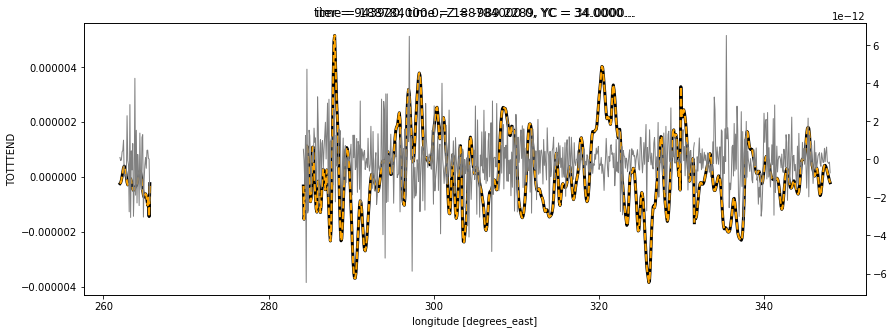

In [34]:
rhs1 = rhs.sel(YC=34, method='nearest').sel(Z=-1000, method='nearest')
lhs1 = lhs.sel(YC=34, method='nearest').sel(Z=-1000, method='nearest')

fig, ax = plt.subplots(figsize=(14,5))
ax2 = ax.twinx()
rhs1.plot(ax=ax, c='k', lw=3)
lhs1.plot(ax=ax, c='orange', ls='--', lw=2)
(rhs1-lhs1).plot(ax=ax2, c='grey', lw=1)

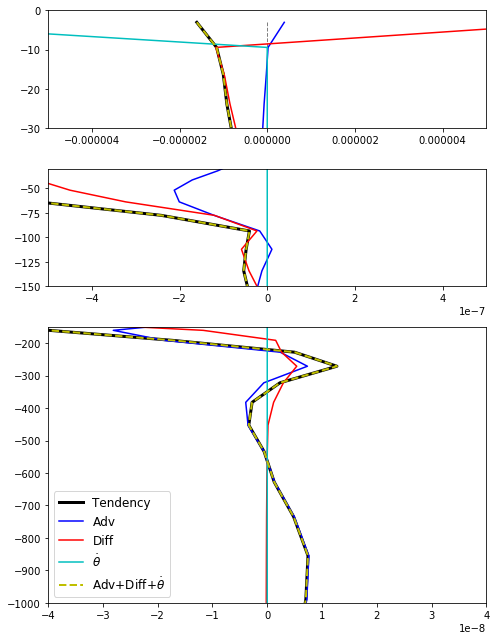

distributed.client - ERROR - Failed to reconnect to scheduler after 10.00 seconds, closing client
_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
concurrent.futures._base.CancelledError


In [25]:
fig = plt.figure(figsize=(7,9))
fig.set_tight_layout(True)
gs = GS(4,1)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[2:,0])

ax1.plot(np.zeros_like(dsdiag.Z), dsdiag.Z, ls='--', color='grey', lw=1)
ax2.plot(np.zeros_like(dsdiag.Z), dsdiag.Z, ls='--', color='grey', lw=1)
ax3.plot(np.zeros_like(dsdiag.Z), dsdiag.Z, ls='--', color='grey', lw=1)

ax1.plot(lhs_b, dsdiag.Z, 'k', lw=3)
ax1.plot(adv_b, dsdiag.Z, 'b')
ax1.plot(dif_b, dsdiag.Z, 'r')
# ax1.plot(diffE_b, dsdiag.Z, 'r--')
# ax1.plot(diffI_b, dsdiag.Z, 'r:')
# ax1.plot(kpp_b, dsdiag.Z, 'g')
ax1.plot(totflx_b, dsdiag.Z, 'c')
ax1.plot(rhs_b, dsdiag.Z, 'y--', lw=2)
ax1.set_xlim([-5e-6,5e-6])
ax1.set_ylim([-3e1,0])

ax2.plot(lhs_b, dsdiag.Z, 'k', lw=3)
ax2.plot(adv_b, dsdiag.Z, 'b')
ax2.plot(dif_b, dsdiag.Z, 'r')
# ax2.plot(diffE_b, dsdiag.Z, 'r--')
# ax2.plot(diffI_b, dsdiag.Z, 'r:')
# ax2.plot(kpp_b, dsdiag.Z, 'g')
ax2.plot(totflx_b, dsdiag.Z, 'c')
ax2.plot(rhs_b, dsdiag.Z, 'y--', lw=2)
ax2.set_xlim([-5e-7,5e-7])
ax2.set_ylim([-1.5e2,-3e1])

ax3.plot(lhs_b, dsdiag.Z, 'k', lw=3, label='Tendency')
ax3.plot(adv_b, dsdiag.Z, 'b', label='Adv')
ax3.plot(dif_b, dsdiag.Z, 'r', label='Diff')
# ax3.plot(diffE_b, dsdiag.Z, 'r--')
# ax3.plot(diffI_b, dsdiag.Z, 'r:')
# ax3.plot(kpp_b, dsdiag.Z, 'g', label='KPP')
ax3.plot(totflx_b, dsdiag.Z, 'c', label=r'$\dot{\theta}$')
ax3.plot(rhs_b, dsdiag.Z, 'y--', lw=2, label=r'Adv+Diff+$\dot{\theta}$')
ax3.set_xlim([-4e-8,4e-8])
ax3.set_ylim([-1e3,-1.5e2])
ax3.legend(loc='lower left', fontsize=12)

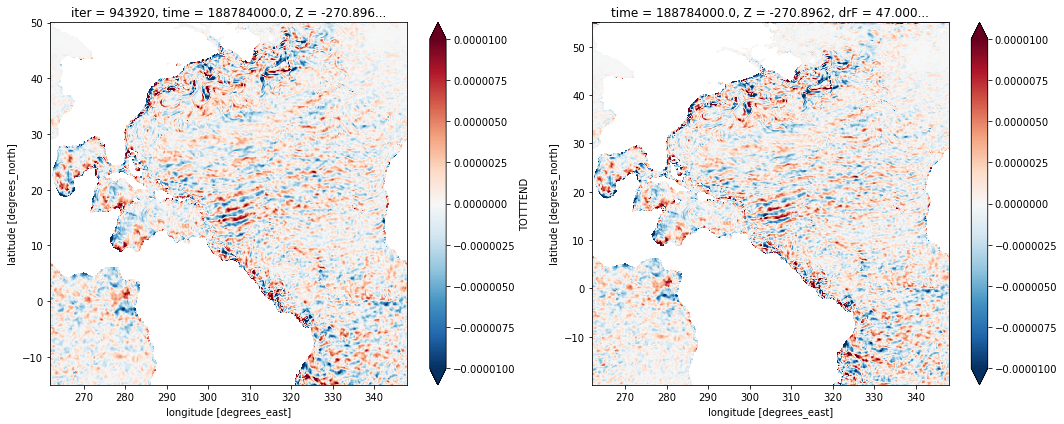

In [50]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
fig.set_tight_layout(True)
lhs[15].plot(ax=ax1, vmax=1e-5)
rhs.where(dsdiag.maskC!=0.)[15].plot(ax=ax2, vmax=1e-5)

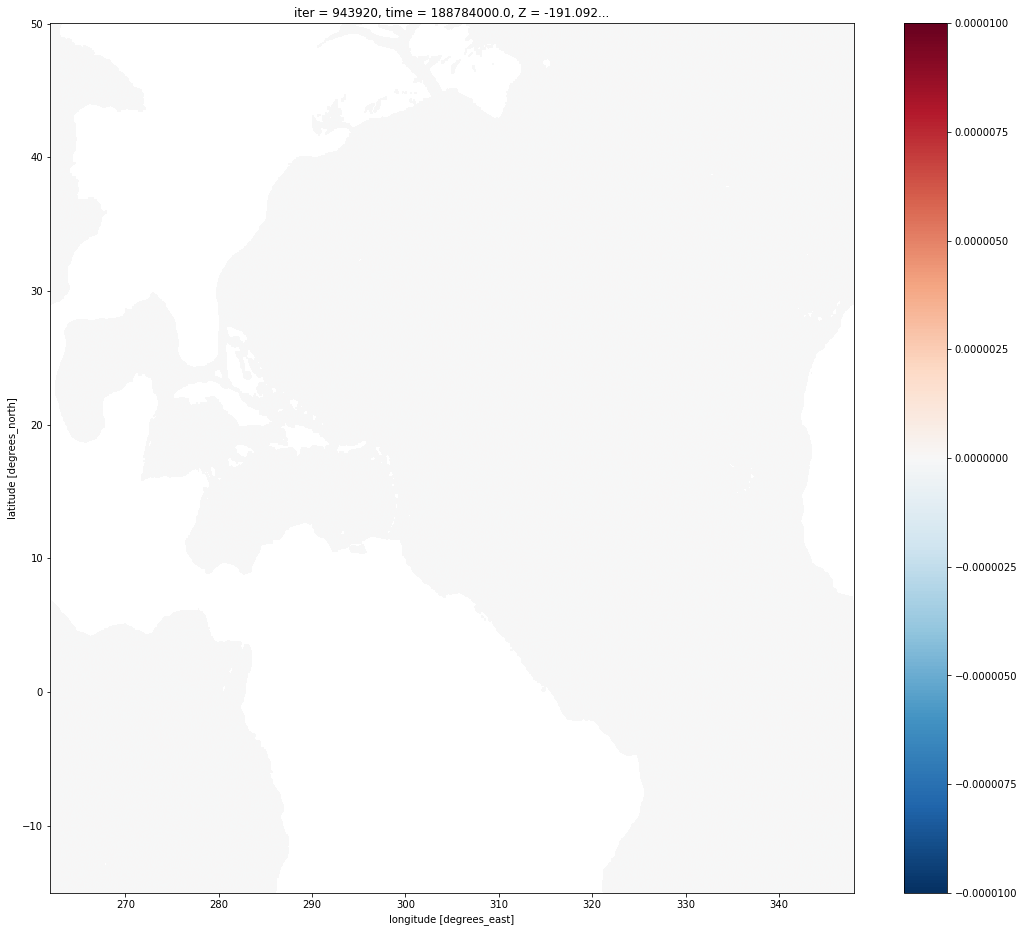

In [51]:
(lhs-rhs)[13].plot(figsize=(18,16), vmax=1e-5)

In [55]:
xchunk = 500
for nmemb in range(24,29):
    if nmemb == 24:
        ds = open_mdsdataset(ddir+'qjamet/RUNS/ORAR/memb%02d/run1963/ocn/' % nmemb, 
                             grid_dir=ddir+'grid_chaO/gridMIT_update1/',
                             prefix=['diag_ocnSnap'], delta_t=2e2,
                             iters=943920
                            ).chunk({'XC':xchunk,'XG':xchunk})
    else:
        ds = xr.concat([ds, open_mdsdataset(ddir+'qjamet/RUNS/ORAR/memb%02d/run1963/ocn/' % nmemb, 
                                            grid_dir=ddir+'grid_chaO/gridMIT_update1/',
                                            prefix=['diag_ocnSnap'], delta_t=2e2,
                                            iters=943920
                                           ).chunk({'XC':xchunk,'XG':xchunk})],
                      dim='nmemb')
ds

<xarray.Dataset>
Dimensions:  (XC: 1000, XG: 1000, YC: 900, YG: 900, Z: 46, Zl: 46, Zp1: 47, Zu: 46, nmemb: 5, time: 1)
Coordinates:
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    hFacW    (Z, YC, XG) >f4 dask.array<chunksize=(46, 900, 500), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<chunksize=(900, 500), meta=np.ndarray>
    dyG      (YC, XG) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    dxC      (YC, XG) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    PHrefF   (Zp1) >f4 dask.array<chunksize=(47,), meta=np.ndarray>
    rAz      (YG, XG) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    dyC      (YG, XC) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    PHrefC   (Z) >f4 dask.array<chunksize=(46,), meta=np.ndarray>
    drC      (Zp1) >f4 dask.array<chunksize=(47,), meta=np.ndarray>
    hFacS    (Z, YG, XC) >f4 dask.array<chunksize=(46, 900, 500), meta=np.ndarray>
    dxG      (YG, XC) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    maskC    (Z, YC, XC) bool dask.array<chunksize=(46, 900, 500), meta=np.ndarray>
    hFacC    (Z, YC, XC) >f4 dask.array<chunksize=(46, 900, 500), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    maskW    (Z, YC, XG) bool dask.array<chunksize=(46, 900, 500), meta=np.ndarray>
    maskInW  (YC, XG) bool dask.array<chunksize=(900, 500), meta=np.ndarray>
    maskS    (Z, YG, XC) bool dask.array<chunksize=(46, 900, 500), meta=np.ndarray>
    rAw      (YC, XG) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    rA       (YC, XC) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    rAs      (YG, XC) >f4 dask.array<chunksize=(900, 500), meta=np.ndarray>
    maskInS  (YG, XC) bool dask.array<chunksize=(900, 500), meta=np.ndarray>
    drF      (Z) >f4 dask.array<chunksize=(46,), meta=np.ndarray>
  * Zp1      (Zp1) >f4 0.0 -6.0935454 -12.814552 ... -5749.9097 -6000.3726
  * Zu       (Zu) >f4 -6.0935454 -12.814552 -19.91338 ... -5749.9097 -6000.3726
  * XG       (XG) >f4 261.957 262.04306 262.12912 ... 347.8434 347.92947
  * time     (time) float64 1.888e+08
  * Zl       (Zl) >f4 0.0 -6.0935454 -12.814552 ... -5499.9937 -5749.9097
  * YC       (YC) >f4 -19.916634 -19.8333 -19.749968 ... 54.916702 55.000034
  * XC       (XC) >f4 262.00003 262.0861 262.17215 ... 347.88644 347.9725
  * YG       (YG) >f4 -19.9583 -19.874968 -19.791634 ... 54.875034 54.95837
  * Z        (Z) >f4 -3.0467727 -9.454049 -16.363966 ... -5624.9517 -5875.141
Dimensions without coordinates: nmemb
Data variables:
    THETA    (nmemb, time, Z, YC, XC) float32 dask.array<chunksize=(1, 1, 46, 900, 500), meta=np.ndarray>
    SALT     (nmemb, time, Z, YC, XC) float32 dask.array<chunksize=(1, 1, 46, 900, 500), meta=np.ndarray>
    UVEL     (nmemb, time, Z, YC, XG) float32 dask.array<chunksize=(1, 1, 46, 900, 500), meta=np.ndarray>
    VVEL     (nmemb, time, Z, YG, XC) float32 dask.array<chunksize=(1, 1, 46, 900, 500), meta=np.ndarray>
    WVEL     (nmemb, time, Zl, YC, XC) float32 dask.array<chunksize=(1, 1, 46, 900, 500), meta=np.ndarray>
    PHIHYD   (nmemb, time, Z, YC, XC) float32 dask.array<chunksize=(1, 1, 46, 900, 500), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    title:        netCDF wrapper of MITgcm MDS binary data
    source:       MITgcm
    history:      Created by calling `open_mdsdataset(grid_dir='/tank/chaocea...

In [1]:
for i in range(len(ds.nmemb)):
    fig, ax = plt.subplots(figsize=(8,6))
    im = ax.pcolormesh(ds.XC, ds.YC, 
                       np.sqrt(grid.interp(ds.UVEL.where(ds.maskW!=0.)[i,0,0]**2,'X')
                               + grid.interp(ds.VVEL.where(ds.maskS!=0.)[i,0,0]**2,'Y',
                                             boundary='fill')), 
                       vmin=0., vmax=1.2,
                       cmap='cividis', rasterized=True)
#     ax.pcolor(ds.XC, ds.YC, ds.Depth.where(ds.YC>50), hatch='X', alpha=0., rasterized=True)
#     ax.pcolor(ds.XC, ds.YC, ds.Depth.where(ds.YC<-15), hatch='X', alpha=0., rasterized=True)
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label(r"[m s$^{-1}$]")
    ax.set_xlabel('Longitude', fontsize=13)
    ax.set_ylabel('Latitude', fontsize=13)
    plt.savefig(op.join(savedir,'Figures/Speed_1963_nmemb%02d.pdf' % i))
    if i < 4:
        plt.close()

NameError: name 'ds' is not defined